# Comparative Analysis
In this notebook, we compare ClaSS with competitors.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import gc
import Orange
import sys
sys.path.append("../../")

from tqdm import tqdm

In [3]:
from src.visualizer import plot_profile, plot_profile_with_ts

Let's choose a score for evaluation (F1 or Covering).

In [4]:
eval_score = "covering_score"

Let's load the scores from the different methods.

In [5]:
competitors = ["ADWIN", "HDDM", "NEWMA", "ChangeFinder", "DDM", "Window", "FLOSS", "ClaSS"]
datasets = ["PAMAP", "mHealth", "WESAD", "MIT-BIH-VE", "MIT-BIH-Arr", "SleepDB"] # 
methods, dfs = list(), list()

for candidate_name in competitors:
    methods.append((candidate_name, f"{candidate_name}.csv.gz"))


for idx, (name, file_name) in enumerate(tqdm(methods)):
    df = []
    
    for d in datasets:
        df.append(pd.read_csv(f"../../experiments/competitor_{d}/{file_name}", usecols=["dataset", eval_score], compression="gzip"))
            
    df = pd.concat(df)    
    df.sort_values(by="dataset", inplace=True)
    dfs.append((name, df))
    
    gc.collect()
        
df_scores = pd.DataFrame()

for name, df in dfs:
    df_scores["dataset"] = df.dataset
    df_scores[name] = df[eval_score]
    
df_scores.reset_index(drop=True, inplace=True)
df_scores

100%|████████████████████████████████████████████| 8/8 [13:46<00:00, 103.28s/it]


,dataset,ADWIN,HDDM,NEWMA,ChangeFinder,DDM,Window,FLOSS,ClaSS
0,MIT-BIH-Arr_MLII_Subject100,0.041,1.000,1.000,0.167,1.000,1.000,0.500,0.659
1,MIT-BIH-Arr_MLII_Subject101,0.040,0.714,1.000,0.304,1.000,1.000,0.234,0.516
2,MIT-BIH-Arr_MLII_Subject103,0.035,0.605,1.000,0.463,1.000,1.000,0.291,0.329
3,MIT-BIH-Arr_MLII_Subject105,0.066,0.470,1.000,0.669,1.000,1.000,0.123,0.306
4,MIT-BIH-Arr_MLII_Subject106,0.297,0.353,0.126,0.169,0.126,0.126,0.306,0.372
5,MIT-BIH-Arr_MLII_Subject107,0.066,0.016,1.000,0.049,1.000,1.000,0.148,0.442
6,MIT-BIH-Arr_MLII_Subject108,0.026,0.188,1.000,0.092,1.000,1.000,0.098,0.186
7,MIT-BIH-Arr_MLII_Subject109,0.169,0.872,1.000,0.339,1.000,1.000,0.536,0.267
8,MIT-BIH-Arr_MLII_Subject111,0.026,0.134,1.000,0.125,1.000,1.000,0.083,0.276
9,MIT-BIH-Arr_MLII_Subject112,0.032,0.444,1.000,0.222,1.000,1.000,0.228,0.389


Let's calculate the mean/median/std score.

In [6]:
df_scores.mean(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_20630/2219294936.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_scores.mean(axis=0).round(3)


ADWIN           0.262
HDDM            0.246
NEWMA           0.215
ChangeFinder    0.423
DDM             0.262
Window          0.291
FLOSS           0.356
ClaSS           0.515
dtype: float64

In [7]:
df_scores.median(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_20630/1729043111.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_scores.median(axis=0).round(3)


ADWIN           0.206
HDDM            0.234
NEWMA           0.116
ChangeFinder    0.416
DDM             0.171
Window          0.220
FLOSS           0.359
ClaSS           0.493
dtype: float64

In [8]:
df_scores.std(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_20630/1084607075.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_scores.std(axis=0).round(3)


ADWIN           0.205
HDDM            0.185
NEWMA           0.262
ChangeFinder    0.197
DDM             0.245
Window          0.277
FLOSS           0.130
ClaSS           0.171
dtype: float64

In [9]:
# sensors
ECG = ("MIT-BIH", "ECG")
ACC = ("ACC", "Acc")
GYRO = ("Gyro",)
MAG = ("Mag",)
EEG = ("EEG",)
EOG = ("EOG",)
EMG = ("EMG",)
EDA = ("EDA",)
Resp = ("Resp",)
Temp = ("Temp",)

df_sel = df_scores[df_scores.dataset.apply(lambda d: any(sensor in d for sensor in Temp))]
df_sel.shape

(4, 9)

In [10]:
df_sel = df_scores[df_scores.dataset.apply(lambda n: "MIT-BIH-Arr" in n)]

Let's compute the wins per method.

In [11]:
ranks = df_scores.rank(1, method = 'min', ascending=False)
means = np.array(ranks.mean(axis=0))

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_20630/3065857076.py:1: FutureWarning: Dropping of nuisance columns in DataFrame.rank is deprecated; in a future version this will raise TypeError. Select only valid columns before calling rank.
  ranks = df_scores.rank(1, method = 'min', ascending=False)


In [12]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 1)}")

ADWIN:wins=25 rank=4.7
HDDM:wins=21 rank=5.0
NEWMA:wins=45 rank=5.4
ChangeFinder:wins=95 rank=3.1
DDM:wins=41 rank=4.8
Window:wins=65 rank=4.5
FLOSS:wins=45 rank=3.7
ClaSS:wins=227 rank=2.1


Let's plot and output the ranks.

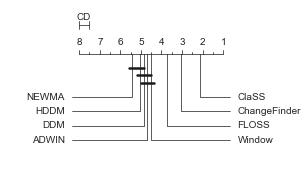

In [13]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], cd=cd, reverse=True, width=4, filename=f"../../figures/cd_comparative_archives.pdf") # 

Let's compute wins/losses against ClaSP.

In [14]:
selection = "ClaSS"

for rival in df_scores.columns[1:]:
    if rival == selection: continue
    
    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=False)
    
    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

ClaSS vs ADWIN: (wins/ties/losses): 441/1/43
ClaSS vs HDDM: (wins/ties/losses): 422/1/62
ClaSS vs NEWMA: (wins/ties/losses): 426/3/56
ClaSS vs ChangeFinder: (wins/ties/losses): 336/3/146
ClaSS vs DDM: (wins/ties/losses): 419/3/63
ClaSS vs Window: (wins/ties/losses): 386/3/96
ClaSS vs FLOSS: (wins/ties/losses): 399/2/84


/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_20630/2949747964.py:8: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)
/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_20630/2949747964.py:11: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)


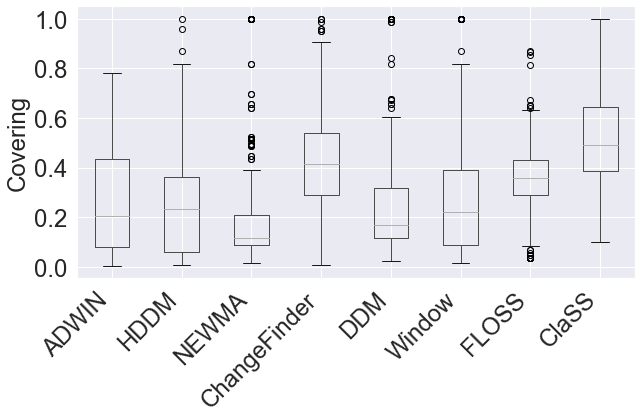

In [15]:
fontsize = 24
_, ax = plt.subplots(figsize=(10,5))

df_scores.boxplot(ax=ax, rot=90)
ax.set_ylabel("Covering", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
    
ax.set_xticklabels(df_scores.columns[1:], rotation=45, ha="right")
ax.set_yticks(np.round(np.arange(0, 1.0+.2,.2),1))
    
plt.savefig(f"../../figures/bp_comparative_archives.pdf", bbox_inches="tight") 

In [16]:
df_scores.shape

(485, 9)